# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Leonardo Marcellino Gunawan
- **Email:** leo.marcell.g@gmail.com
- **ID Dicoding:** leomarcell

## Menentukan Pertanyaan Bisnis

- Pada tahun berapakah volume terbesar sewa sepeda? Apakah naik atau turun dari tahun sebelumnya?
- Pada musim apa penggunaan sewa sepeda paling banyak?
- Kapan jam aktif sewa sepeda?
- Apakah faktor cuaca berdampak pada jumlah penggunaan sewa sepeda?
- Bagaimana distribusi penggunaan sewa sepeda pada saat working day musim Fall dan cuaca cerah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv("Data\day.csv")
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
df = pd.read_csv("Data\hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


column dteday value nya date tapi data type nya object64 seharusnya datetime

#### Check null

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

no null value

#### Check duplicate

In [6]:
df.duplicated().sum()

0

no duplicate

In [7]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Check outlier

In [8]:
# list column yg mungkin memiliki outlier
datas = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [9]:
for data in datas:
    q25, q75 = np.percentile(df[data], 25), np.percentile(df[data], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
     
    outliers = [x for x in df[data] if x < minimum or x > maximum]
    print("check", data, "outliers: ", outliers)
    print()

check temp outliers:  []

check atemp outliers:  []

check hum outliers:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

check windspeed outliers:  [0.4925, 0.5522, 0.5224, 0.5224, 0.5821, 0.5224, 0.5821, 0.5821, 0.5224, 0.5224, 0.5522, 0.4925, 0.5522, 0.5224, 0.4925, 0.4925, 0.5522, 0.4925, 0.5224, 0.5821, 0.5224, 0.4925, 0.6567, 0.6119, 0.6119, 0.4925, 0.5224, 0.6567, 0.4925, 0.7761, 0.6866, 0.5224, 0.5821, 0.4925, 0.4925, 0.5224, 0.5821, 0.6567, 0.5821, 0.5821, 0.4925, 0.6119, 0.6567, 0.7463, 0.6418, 0.6119, 0.5224, 0.5522, 0.4925, 0.5522, 0.5522, 0.5522, 0.6119, 0.806, 0.7463, 0.4925, 0.6119, 0.4925, 0.6119, 0.6119, 0.4925, 0.5224, 0.5522, 0.5224, 0.4925, 0.4925, 0.6119, 0.5821, 0.5224, 0.5821, 0.4925, 0.4925, 0.4925, 0.6418, 0.4925, 0.4925, 0.5522, 0.5224, 0.6119, 0.4925, 0.5522, 0.4925, 0.5821, 0.4925, 0.4925, 0.4925, 0.5224, 0.4925, 0.5224, 0.5224, 0.5224, 0.5224, 0.4925, 0.5224, 0.4925, 0.5821, 0.5224, 0.5821, 0.5

Dengan menggunakan rumus IQR ditemukan beberapa column yang mungkin memiliki outlier yaitu:
1. hum (humidity)
2. windspeed
3. casual
4. registered
5. cnt

Setelah diperhatikan beberapa column diduga outlier bukanlah outlier karena valuenya masih termasuk relatif normal

Check Humidity

In [10]:
q25, q75 = np.percentile(df['hum'], 25), np.percentile(df['hum'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df['hum'] if x < minimum or x > maximum]
print("check humidity outliers: ", outliers)
print('outliers sum:',  len(outliers))

check humidity outliers:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers sum: 22


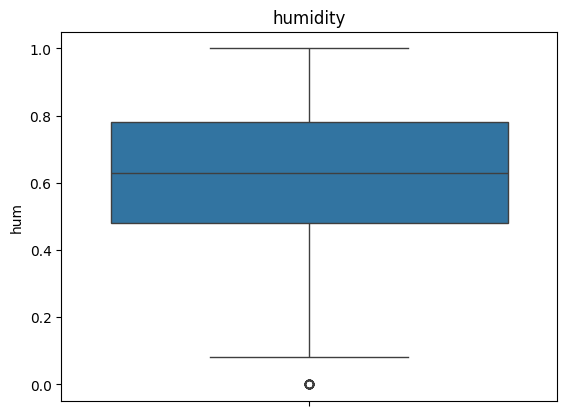

In [11]:
sns.boxplot(df['hum'])
plt.title('humidity')
plt.show()

### Cleaning Data

#### Drop column instant 
karena hanya berfungsi sebagai indexing

In [12]:
df.drop('instant', axis=1)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Cleaning humidity column

Disini terdapat outlier humidity dengan nilai 0% dimana ini tidak masuk akal untuk keadaan normal. Jadi saya akan mengubah nilai outliernya dengan boundary value

In [13]:
Q1 = (df['hum']).quantile(0.25)
Q3 = (df['hum']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

df['hum'] = df['hum'].clip(lower=minimum, upper=maximum)

check outlier humidity lagi

In [14]:
q25, q75 = np.percentile(df['hum'], 25), np.percentile(df['hum'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
 
outliers = [x for x in df['hum'] if x < minimum or x > maximum]
print("check humidity outliers: ", outliers)
print('outliers sum:',  len(outliers))

check humidity outliers:  []
outliers sum: 0


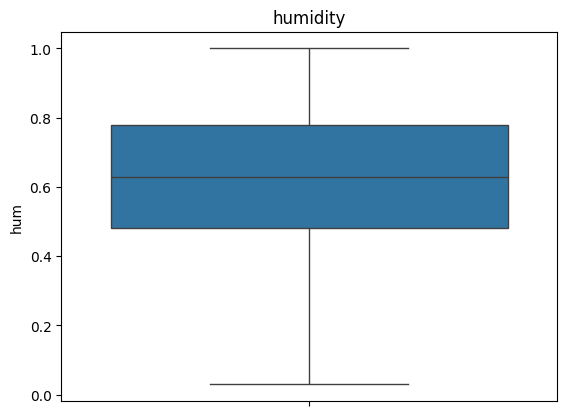

In [15]:
sns.boxplot(df['hum'])
plt.title('humidity')
plt.show()

#### Fixing dteday column datatype

Merubah datatype dari dteday yang awalnya object menjadi datetime

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
df["dteday"] = pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Check the data correlation

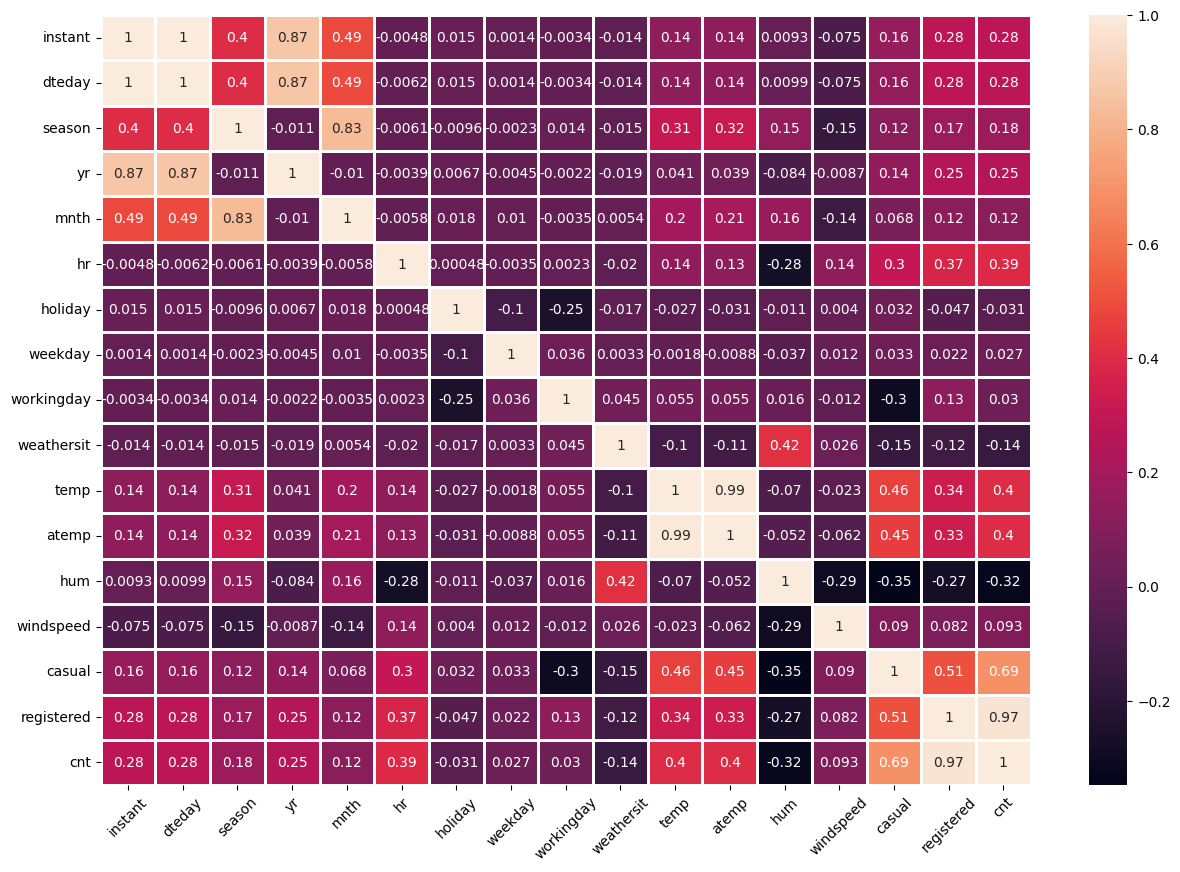

In [36]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(df.corr(), annot=True, linewidths=1)
# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.show()

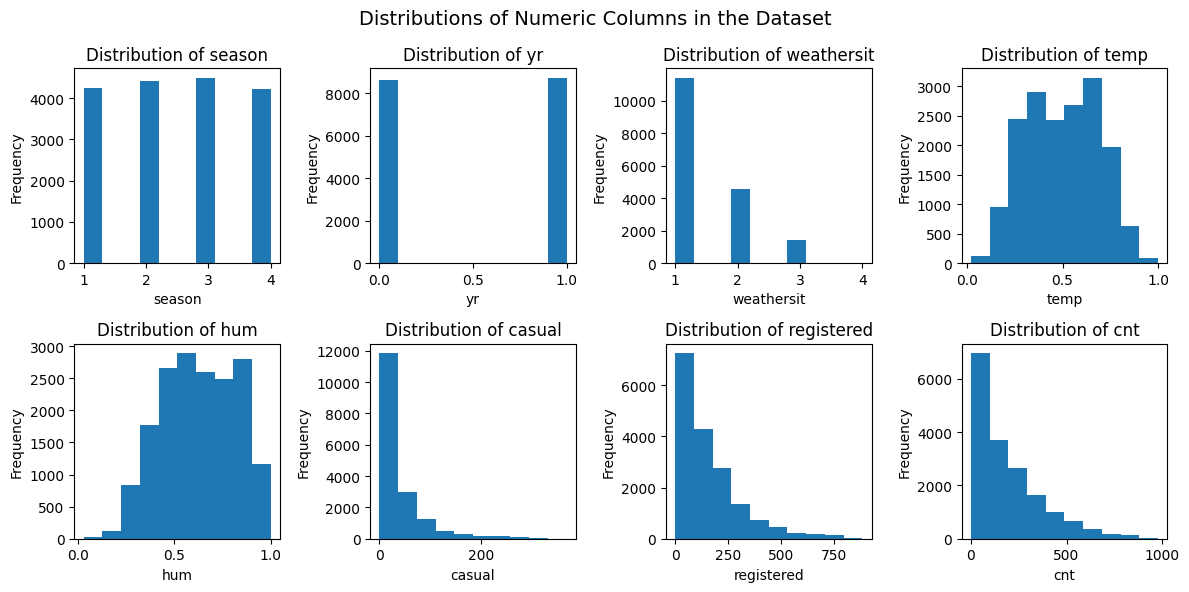

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'df' loaded with the data

numeric_cols = ['season', 'yr', 'weathersit', 'temp', 'hum', 'casual', 'registered', 'cnt']

# Create a single figure with subplots for each numeric column
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # Adjust figsize for better visualization

# Iterate through columns and create histograms with informative titles
for i, col in enumerate(numeric_cols):
    row, col_index = divmod(i, 4)  # Calculate row and column indices for subplots
    axes[row, col_index].hist(df[col])
    axes[row, col_index].set_title(f"Distribution of {col}")
    axes[row, col_index].set_xlabel(col)
    axes[row, col_index].set_ylabel("Frequency")

# Adjust layout (optional, but recommended for aesthetics)
fig.suptitle("Distributions of Numeric Columns in the Dataset", fontsize=14)
plt.tight_layout()

plt.show()


Dari table histogram diatas terlihat bahwa persebaran data untuk season, year tersebar dengan rata. 
1. Data antara tahun 2011 dan 2012 bisa dibilang sama banyaknya
2. Record data untuk 4 musim banyaknya hampir sama (tidak terlalu beda jauh), termasuk data yang ideal
3. Berdasarkan record sewa sepeda sering terjadi pada saat weathernya Clear, Few clouds, Partly cloudy, Partly cloudy 

Check the correlation between season and count of rental bikes (cnt)

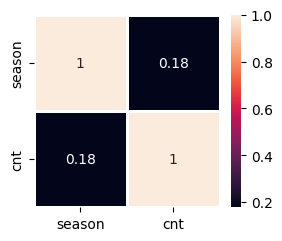

In [20]:
plt.figure(figsize=(3,2.5))
sns.heatmap(df[['season', 'cnt']].corr(), annot=True, linewidths=1)
plt.show()

Check the correlation between temperature (temp) and count of rental bikes (cnt)

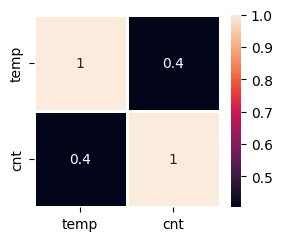

In [38]:
plt.figure(figsize=(3,2.5))
sns.heatmap(df[['temp', 'cnt']].corr(), annot=True, linewidths=1)
plt.show()

## Visualization & Explanatory Analysis

### Pada tahun berapakah volume terbesar sewa sepeda? Apakah naik atau turun dari tahun sebelumnya?

In [21]:
# Mengelompokkan data berdasarkan tahun ('yr') dan menghitung total jumlah penggunaan sepeda untuk setiap tahun
total_pengguna_per_tahun = df.groupby('yr')['cnt'].sum()
print(total_pengguna_per_tahun)

# Mencari tahun dengan jumlah penggunaan sepeda terbanyak
tahun_terbanyak = total_pengguna_per_tahun.idxmax()
jumlah_pengguna_terbanyak = total_pengguna_per_tahun.max()

tahun_terbanyak = 2011 if tahun_terbanyak == 0 else 2012

print("Tahun dengan jumlah penggunaan sepeda terbanyak:", tahun_terbanyak)
print("Jumlah penggunaan sepeda terbanyak:", jumlah_pengguna_terbanyak)

yr
0    1243103
1    2049576
Name: cnt, dtype: int64
Tahun dengan jumlah penggunaan sepeda terbanyak: 2012
Jumlah penggunaan sepeda terbanyak: 2049576


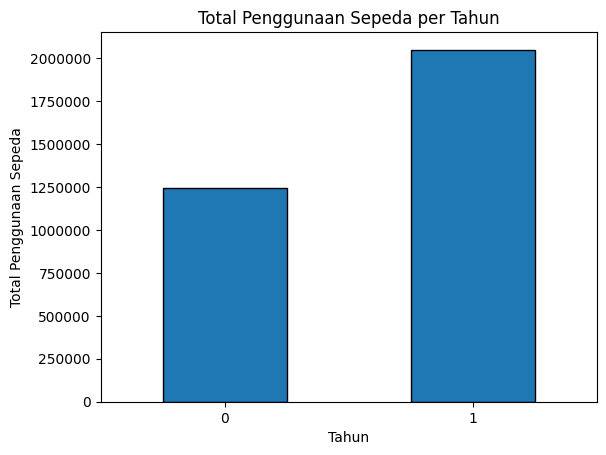

In [22]:
total_pengguna_per_tahun.plot(kind='bar', edgecolor='black')
plt.xlabel('Tahun')
plt.ylabel('Total Penggunaan Sepeda')
plt.title('Total Penggunaan Sepeda per Tahun')
plt.ticklabel_format(style='plain', axis='y')  # Display y-axis tick labels in plain numeric format
plt.xticks(rotation=0) 
plt.show()

In [23]:
# Menghitung persentase peningkatan dari tahun 2011 ke 2012
peningkatan_persen = ((total_pengguna_per_tahun[1] - total_pengguna_per_tahun[0]) / total_pengguna_per_tahun[0]) * 100

print(f"Peningkatan persen dari tahun 2011 ke tahun 2012: {peningkatan_persen:.2f}%")

Peningkatan persen dari tahun 2011 ke tahun 2012: 64.88%


### Pada musim apa penggunaan sewa sepeda paling banyak?

In [24]:
year_2011_data = df[df['yr'] == 0]
year_2012_data = df[df['yr'] == 1]

# group season per tahun
year_2011_counts = year_2011_data.groupby('season')['cnt'].sum()
year_2012_counts = year_2012_data.groupby('season')['cnt'].sum()

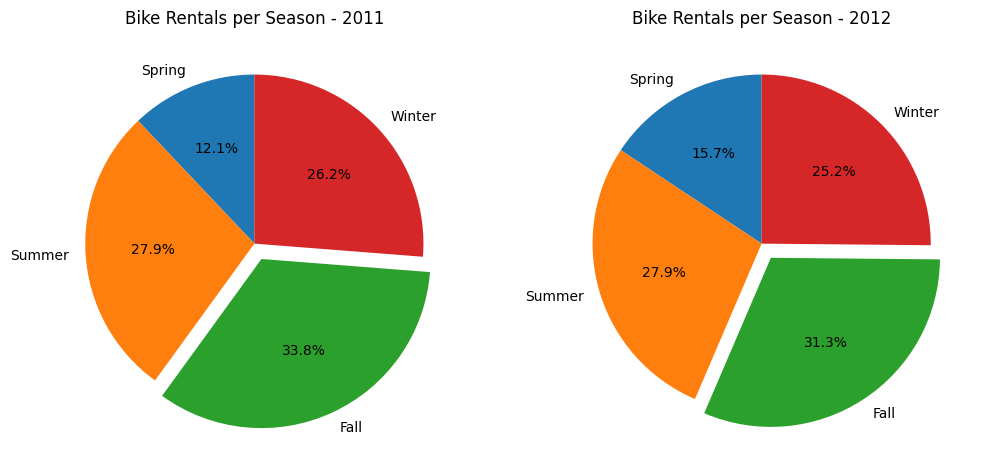

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 2011
axs[0].pie(year_2011_counts, labels=year_2011_counts.index.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}), autopct='%1.1f%%', startangle=90, explode=(0, 0, 0.1, 0))
axs[0].set_title('Bike Rentals per Season - 2011')

# 2012
axs[1].pie(year_2012_counts, labels=year_2012_counts.index.map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}), autopct='%1.1f%%', startangle=90, explode=(0, 0, 0.1, 0))
axs[1].set_title('Bike Rentals per Season - 2012')

plt.show()

Berdasarkan chart diatas terlihat bahwa pada tahun 2011 dan 2012 penggunaan sewa sepeda terbanyak terjadi pada musim Fall, kemudian diikuti dengan Summer, Winter, Spring.

Dari data ini bisa diasumsikan untuk tahun depan (2013) distribusi sewa sepeda tiap musim akan mirip/sama seperti tahun-tahun sebelumnya dengan begitu perusahaan bisa menentukan strategi pemasaran yang tepat sesuai dengan pola ini.

### Kapan jam aktif sewa sepeda?

In [26]:
df_meanUser_perHour = df.groupby('hr')['cnt'].mean()
df_meanUser_perHour

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

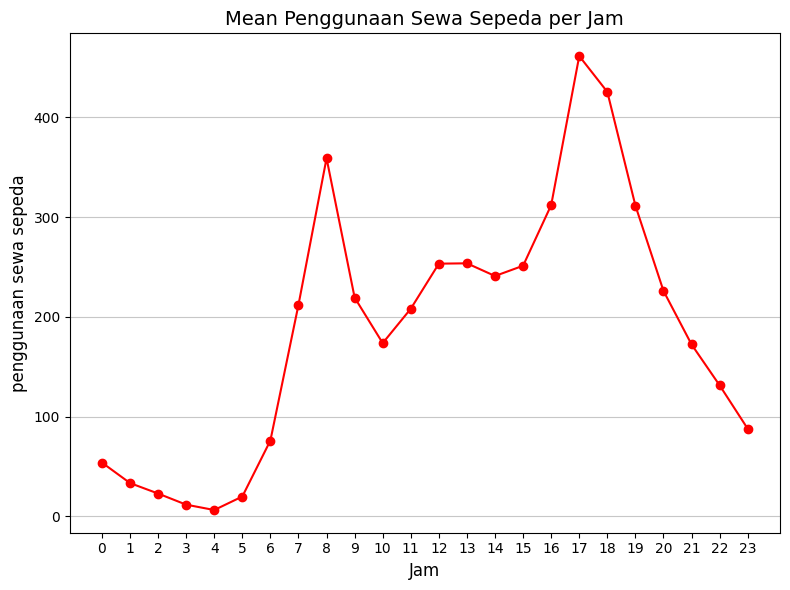

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(df_meanUser_perHour.index, df_meanUser_perHour.values, marker='o', color='red', linestyle='-')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('penggunaan sewa sepeda', fontsize=12)
plt.title('Mean Penggunaan Sewa Sepeda per Jam', fontsize=14)
plt.xticks(range(24))
plt.grid(True, linestyle='-', alpha=0.7, axis='y') 
plt.tight_layout()
plt.show()

Penggunaan sepeda mulai aktif pada sekitar jam 6 pagi kemudian naik tinggi pada jam 8 dan puncaknya pada jam 5 sore. Disekitar jam 7-8 mungkin adalah jam orang masuk kerja/sekolah, dan jam 16-19 pulang kerja karena itu jumlah penggunaannya meningkat pada jam-jam itu.

### Apakah faktor cuaca berdampak pada jumlah penggunaan sewa sepeda?

In [28]:
df_meanUser_perWeather = df.groupby('weathersit')['cnt'].mean()
df_meanUser_perWeather

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64

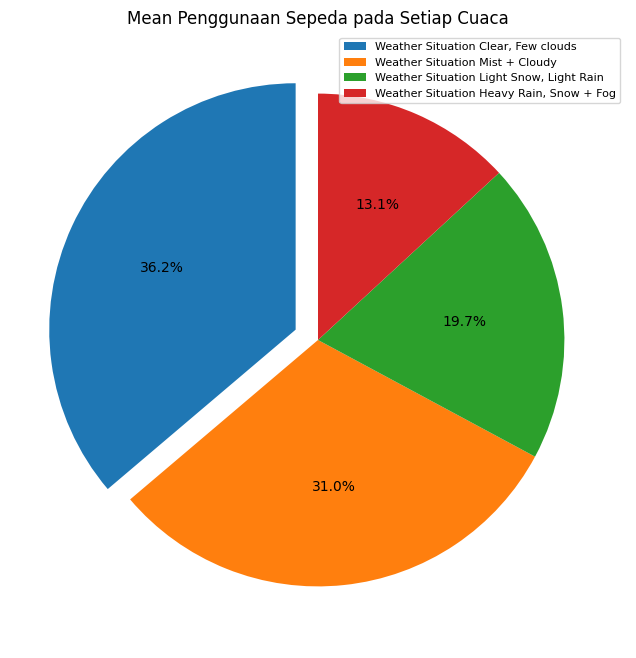

In [29]:
labels = ['Clear, Few clouds', 'Mist + Cloudy', 'Light Snow, Light Rain', 'Heavy Rain, Snow + Fog']

plt.figure(figsize=(8,8))  # Set the figure size
plt.pie(df_meanUser_perWeather.values, autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0))
plt.title('Mean Penggunaan Sepeda pada Setiap Cuaca')
plt.legend(loc='upper right', labels=['Weather Situation ' + str(label) for label in labels], fontsize=8)
plt.show()

### Bagaimana distribusi penggunaan sewa sepeda pada saat working day musim Fall dan cuaca cerah?

In [30]:
filtered_df = df[(df['workingday'] == 1) & (df['season'] == 3) & (df['weathersit'] == 1)]
filtered_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4010,4011,2011-06-21,3,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33
4021,4022,2011-06-21,3,0,6,11,0,2,1,1,0.66,0.6061,0.83,0.1642,52,119,171
4022,4023,2011-06-21,3,0,6,12,0,2,1,1,0.70,0.6667,0.74,0.1642,40,149,189
4023,4024,2011-06-21,3,0,6,13,0,2,1,1,0.74,0.6970,0.66,0.1642,49,158,207
4024,4025,2011-06-21,3,0,6,14,0,2,1,1,0.76,0.7121,0.62,0.2239,44,108,152


In [31]:
workingDay_fall_clear = filtered_df.groupby('hr')['cnt'].mean()

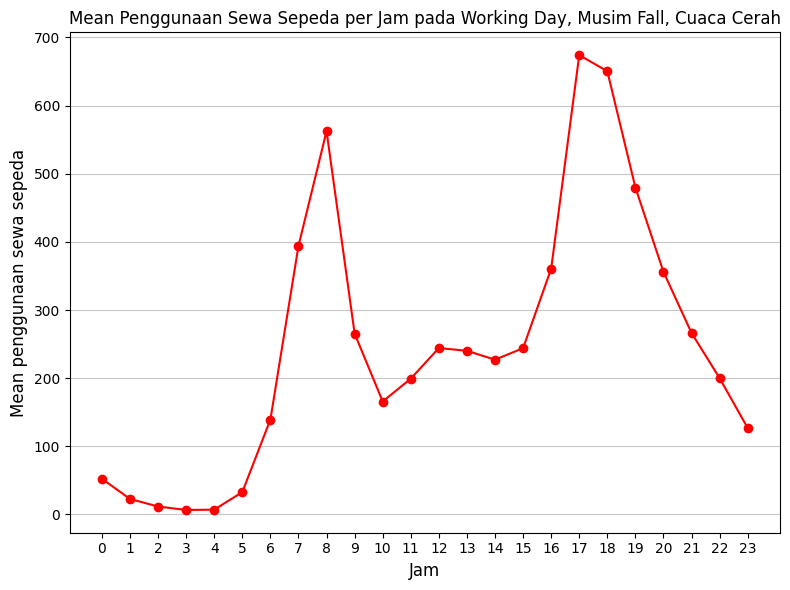

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(workingDay_fall_clear.index, workingDay_fall_clear.values, marker='o', color='red', linestyle='-')
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Mean penggunaan sewa sepeda', fontsize=12)
plt.title('Mean Penggunaan Sewa Sepeda per Jam pada Working Day, Musim Fall, Cuaca Cerah', fontsize=12)
plt.xticks(range(24))
plt.grid(True, linestyle='-', alpha=0.7, axis='y') 
plt.tight_layout()
plt.show()

Jika membandingkan grafik dari jam aktif sewa sepeda dengan grafik diatas (Mean Penggunaan Sewa Sepeda per Jam pada Working Day, Musim Fall, Cuaca Cerah) bisa dilihat bahwa grafiknya mirip, ini menguatkan asumsi sebelumnya.

## Conclusion

1. Ada peningkatan penggunaan sewa sepeda dari tahun 2011 ke 2012 sebesar 64.88%
2. Penggunaan sewa sepeda paling banyak ada di musim Fall, kemudian diikuti dengan Summer, Winter, Spring
3. Penggunaan sepeda mulai aktif pada sekitar jam 6 pagi kemudian naik tinggi pada jam 8 dan puncaknya pada jam 5 sore. Disekitar jam 7-8 mungkin adalah jam orang masuk kerja/sekolah, dan jam 16-19 pulang kerja karena itu jumlah penggunaannya meningkat pada jam-jam itu. Grafik ini bisa dilihat juga di grafik 'Mean Penggunaan Sewa Sepeda per Jam pada Working Day, Musim Fall, Cuaca Cerah'. Bentuk grafiknya mirip, ini menguatkan asumsi sebelumnya
4. Faktor cuaca mempengaruhi volume penggunaan sewa sepeda. Semakin cerah maka semakin banyak penggunanya, jika sebaliknya maka semakin sedikit